In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.pylib as pylab
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [3]:
data = pd.read_csv('bank-additional-full.csv', sep=";", error_bad_lines=False, encoding='latin-1')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
data.shape

(41188, 21)

In [5]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [6]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


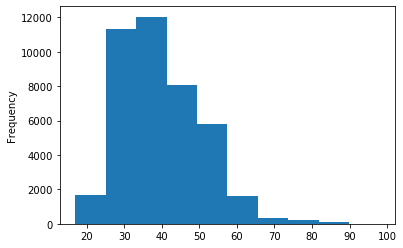

In [7]:
data.age.plot.hist()

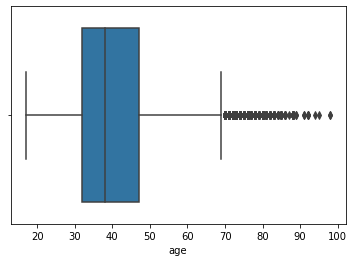

In [8]:
sns.boxplot(x='age', data=data)

In [9]:
len(data[data['age'] > 67])

536

In [10]:
mask = data.age > 67
column = "age"
data.loc[mask, column] = 67
#data.loc[data.age > 67] = 67

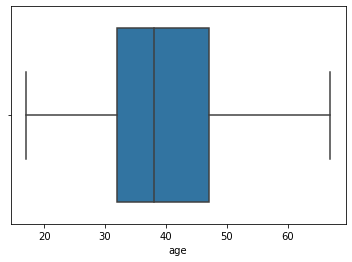

In [11]:
sns.boxplot(x="age", data=data)

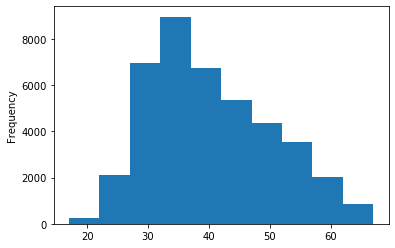

In [12]:
data.age.plot.hist()

In [13]:
data.job.value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [14]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


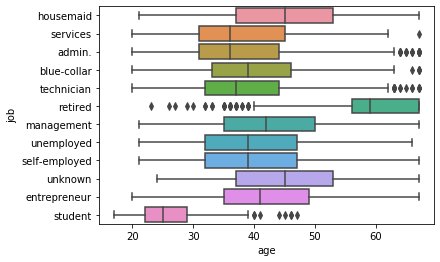

In [15]:
sns.boxplot(x="age", y="job", data=data)

In [16]:
pd.crosstab(data.education, data.job)

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
education,,,,,,,,,,,,
basic.4y,77,2318,137,474,100,597,93,132,26,58,112,52
basic.6y,151,1426,71,77,85,75,25,226,13,87,34,22
basic.9y,499,3623,210,94,166,145,220,388,99,384,186,31
high.school,3329,878,234,174,298,276,118,2682,357,873,259,37
illiterate,1,8,2,1,0,3,3,0,0,0,0,0
professional.course,363,453,135,59,89,241,168,218,43,3320,142,12
university.degree,5753,94,610,139,2063,285,765,173,170,1809,262,45
unknown,249,454,57,42,123,98,29,150,167,212,19,131


In [17]:
pd.crosstab(data.job, data.education)

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
job,,,,,,,,
admin.,77,151,499,3329,1,363,5753,249
blue-collar,2318,1426,3623,878,8,453,94,454
entrepreneur,137,71,210,234,2,135,610,57
housemaid,474,77,94,174,1,59,139,42
management,100,85,166,298,0,89,2063,123
retired,597,75,145,276,3,241,285,98
self-employed,93,25,220,118,3,168,765,29
services,132,226,388,2682,0,218,173,150
student,26,13,99,357,0,43,170,167


In [18]:
data.job.replace('unknown', "unemployed", inplace=True)
data.job.value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
unemployed        1344
housemaid         1060
student            875
Name: job, dtype: int64

In [19]:
data.job.replace('admin.', 0, inplace=True)
data.job.replace('blue-collar', 1, inplace=True)
data.job.replace('technician', 2, inplace=True)
data.job.replace('services', 3, inplace=True)
data.job.replace('management', 4, inplace=True)
data.job.replace('retired', 5, inplace=True)
data.job.replace('entrepreneur', 6, inplace=True)
data.job.replace('self-employed', 7, inplace=True)
data.job.replace('unemployed', 8, inplace=True)
data.job.replace('housemaid', 9, inplace=True)
data.job.replace('student', 10, inplace=True)
data.job.value_counts()

0     10422
1      9254
2      6743
3      3969
4      2924
5      1720
6      1456
7      1421
8      1344
9      1060
10      875
Name: job, dtype: int64

In [20]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,9,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,3,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,3,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,0,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,3,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [21]:
data.marital.value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

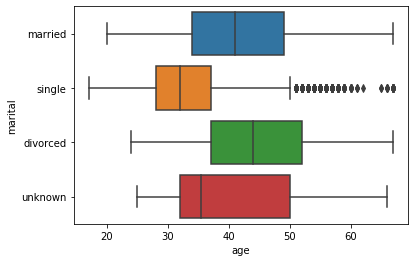

In [22]:
sns.boxplot(x="age", y="marital", data=data)

In [23]:
data.marital.replace("unknown", "married", inplace=True)

In [24]:
data.marital.replace('married', 0, inplace=True)
data.marital.replace('single', 1, inplace=True)
data.marital.replace('divorced', 2, inplace=True)
data.marital.value_counts()

0    25008
1    11568
2     4612
Name: marital, dtype: int64

In [25]:
data.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [26]:
data.education.replace('unknown', 'illiterate', inplace=True)

In [27]:
data.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
illiterate              1749
Name: education, dtype: int64

In [28]:
data.education.replace('university.degree', 0, inplace=True)
data.education.replace('high.school', 1, inplace=True)
data.education.replace('basic.9y', 2, inplace=True)
data.education.replace('professional.course', 3, inplace=True)
data.education.replace('basic.4y', 4, inplace=True)
data.education.replace('basic.6y', 5, inplace=True)
#data.education.replace('unknown', 6, inplace=True)
data.education.replace('illiterate', 6, inplace=True)
data.education.value_counts()

0    12168
1     9515
2     6045
3     5243
4     4176
5     2292
6     1749
Name: education, dtype: int64

In [29]:
data.housing.value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [30]:
data.housing.replace('unknown', 'no', inplace=True)

In [31]:
data.housing.value_counts()

yes    21576
no     19612
Name: housing, dtype: int64

In [32]:
data.housing.replace('yes', 0, inplace=True)
data.housing.replace('no', 1, inplace=True)
data.housing.value_counts()

0    21576
1    19612
Name: housing, dtype: int64

In [33]:
data.loan.value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

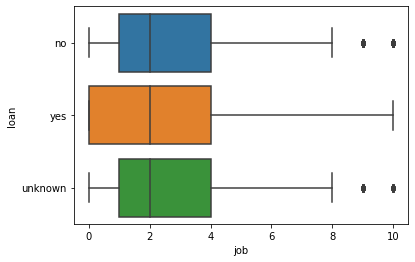

In [34]:
sns.boxplot(x="job", y="loan", data=data)

In [35]:
data.loan.replace('unknown', 'no', inplace=True)

In [36]:
data.loan.value_counts()

no     34940
yes     6248
Name: loan, dtype: int64

In [37]:
data.loan.replace('no', 0, inplace=True)
data.loan.replace('yes', 1, inplace=True)
data.loan.value_counts()

0    34940
1     6248
Name: loan, dtype: int64

In [38]:
data.contact.value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [39]:
data.contact.replace('cellular', 0, inplace=True)
data.contact.replace('telephone', 1, inplace=True)
data.contact.value_counts()

0    26144
1    15044
Name: contact, dtype: int64

In [40]:
data.month.value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [41]:
data.month.replace('jan', 0, inplace=True)
data.month.replace('feb', 1, inplace=True)
data.month.replace('mar', 2, inplace=True)
data.month.replace('apr', 3, inplace=True)
data.month.replace('may', 4, inplace=True)
data.month.replace('jun', 5, inplace=True)
data.month.replace('jul', 6, inplace=True)
data.month.replace('aug', 7, inplace=True)
data.month.replace('sep', 8, inplace=True)
data.month.replace('oct', 9, inplace=True)
data.month.replace('nov', 10, inplace=True)
data.month.replace('dec', 11, inplace=True)
data.month.value_counts()

4     13769
6      7174
7      6178
5      5318
10     4101
3      2632
9       718
8       570
2       546
11      182
Name: month, dtype: int64

In [42]:
data.day_of_week.value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [43]:
data.day_of_week.replace('mon', 0, inplace=True)
data.day_of_week.replace('tue', 1, inplace=True)
data.day_of_week.replace('wed', 2, inplace=True)
data.day_of_week.replace('thu', 3, inplace=True)
data.day_of_week.replace('fri', 4, inplace=True)
data.day_of_week.value_counts()

3    8623
0    8514
2    8134
1    8090
4    7827
Name: day_of_week, dtype: int64

In [44]:
data.poutcome.replace('nonexistent', 0, inplace=True)
data.poutcome.replace('failure', 1, inplace=True)
data.poutcome.replace('success', 2, inplace=True)
data.poutcome.value_counts()

0    35563
1     4252
2     1373
Name: poutcome, dtype: int64

In [45]:
data.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [46]:
data.y.replace('no', 0, inplace=True)
data.y.replace('yes', 1, inplace=True)
data.y.value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int64  
 2   marital         41188 non-null  int64  
 3   education       41188 non-null  int64  
 4   default         41188 non-null  object 
 5   housing         41188 non-null  int64  
 6   loan            41188 non-null  int64  
 7   contact         41188 non-null  int64  
 8   month           41188 non-null  int64  
 9   day_of_week     41188 non-null  int64  
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  int64  
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [48]:
data.default.value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

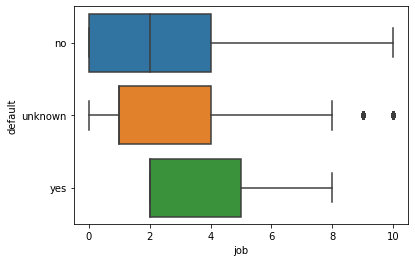

In [49]:
sns.boxplot(x="job", y="default", data=data)

In [50]:
data.default.replace('unknown', 'yes', inplace=True)

In [51]:
data.default.value_counts()

no     32588
yes     8600
Name: default, dtype: int64

In [52]:
data.default.replace('no', 0, inplace=True)
data.default.replace('yes', 1, inplace=True)
data.default.value_counts()

0    32588
1     8600
Name: default, dtype: int64

In [53]:
data.education.value_counts()

0    12168
1     9515
2     6045
3     5243
4     4176
5     2292
6     1749
Name: education, dtype: int64

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int64  
 2   marital         41188 non-null  int64  
 3   education       41188 non-null  int64  
 4   default         41188 non-null  int64  
 5   housing         41188 non-null  int64  
 6   loan            41188 non-null  int64  
 7   contact         41188 non-null  int64  
 8   month           41188 non-null  int64  
 9   day_of_week     41188 non-null  int64  
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  int64  
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [55]:
data.corr()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,0.099659,-0.124736,0.179476,0.173681,0.002291,-0.007735,0.013926,0.076198,-0.018949,...,0.007460,-0.024081,0.012806,0.015415,0.017141,0.009351,0.125220,0.029099,0.003432,0.017666
job,0.099659,1.000000,-0.008207,0.083958,0.023549,0.000254,-0.010667,-0.000892,0.044855,-0.010270,...,-0.013607,-0.057781,0.052801,0.051024,-0.071925,-0.022104,0.042211,-0.064421,-0.086201,0.055890
marital,-0.124736,-0.008207,1.000000,-0.106738,-0.103632,-0.006869,-0.001577,-0.043604,-0.002495,-0.004309,...,0.000403,-0.016699,0.028844,0.028815,-0.047892,-0.023771,-0.051051,-0.053781,-0.049536,0.025622
education,0.179476,0.083958,-0.106738,1.000000,0.196717,0.014458,-0.012435,0.089978,-0.088788,0.006198,...,0.002795,0.018098,-0.022279,-0.025146,0.049076,0.086692,-0.013127,0.040492,0.029692,-0.026894
default,0.173681,0.023549,-0.103632,0.196717,1.000000,0.016749,-0.005424,0.135451,-0.084580,-0.004164,...,0.032923,0.080072,-0.102533,-0.108285,0.203285,0.168234,0.026443,0.195337,0.189829,-0.099344
housing,0.002291,0.000254,-0.006869,0.014458,0.016749,1.000000,-0.056651,0.084472,-0.033252,0.009280,...,0.010800,0.010719,-0.020446,-0.023483,0.059862,0.081920,0.034496,0.058913,0.045046,-0.011743
loan,-0.007735,-0.010667,-0.001577,-0.012435,-0.005424,-0.056651,1.000000,-0.013367,-0.001696,0.001850,...,0.005294,-0.000086,-0.002143,-0.000380,0.001193,-0.005944,-0.013673,-0.000487,0.004205,-0.004466
contact,0.013926,-0.000892,-0.043604,0.089978,0.135451,0.084472,-0.013367,1.000000,-0.324315,0.019583,...,0.077368,0.117970,-0.212848,-0.226813,0.393584,0.591474,0.251614,0.399773,0.269155,-0.144773
month,0.076198,0.044855,-0.002495,-0.088788,-0.084580,-0.033252,-0.001696,-0.324315,1.000000,-0.006959,...,-0.030635,-0.079556,0.063754,0.060841,0.058874,-0.150350,0.264227,0.163411,0.132697,0.037187
day_of_week,-0.018949,-0.010270,-0.004309,0.006198,-0.004164,0.009280,0.001850,0.019583,-0.006959,1.000000,...,0.015098,0.006765,0.004013,0.003279,-0.004401,-0.004586,-0.000099,-0.005552,-0.000734,0.010051


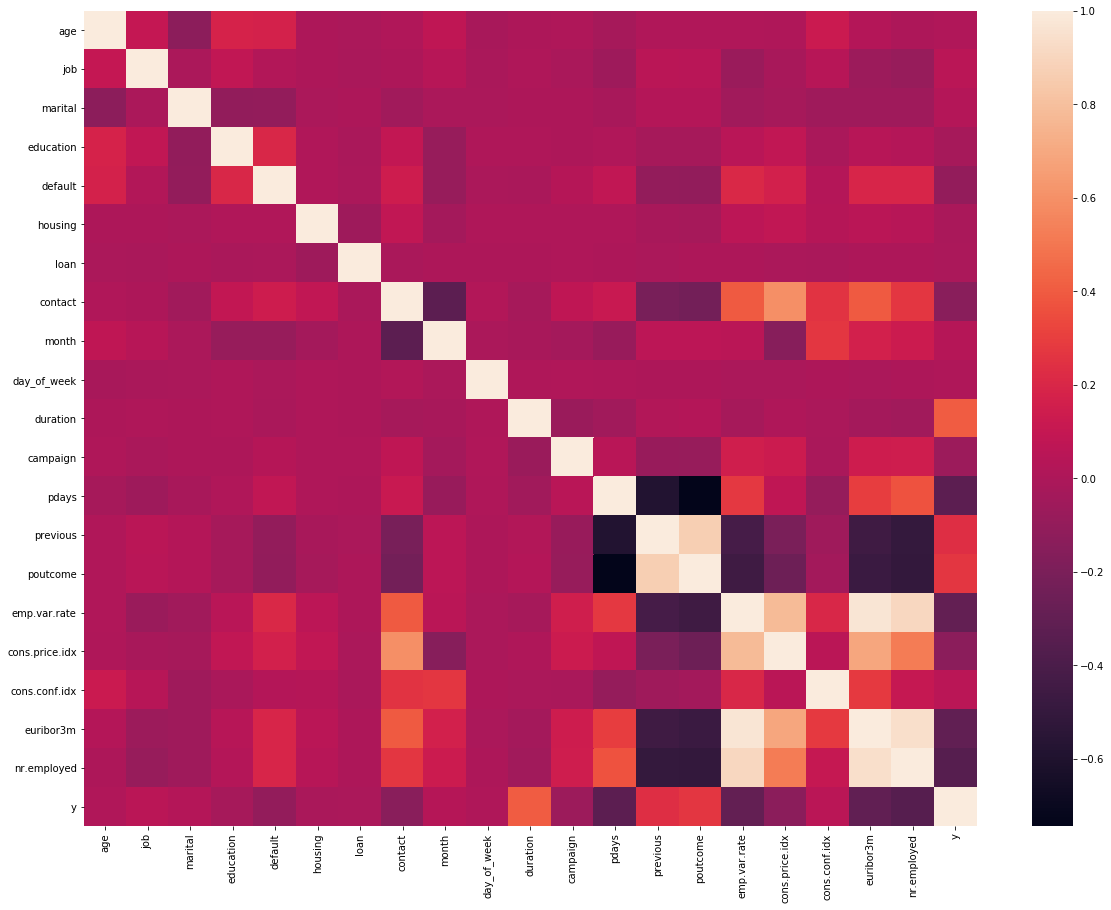

In [56]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr())

In [57]:
X = data.drop('y', axis=1)
Y = data.y

In [58]:
X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,9,0,4,0,1,0,1,4,0,261,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0
1,57,3,0,1,1,1,0,1,4,0,149,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0
2,37,3,0,1,0,0,0,1,4,0,226,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0
3,40,0,0,5,0,1,0,1,4,0,151,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0
4,56,3,0,1,0,1,1,1,4,0,307,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0


In [59]:
X = pd.get_dummies(X, columns=["job", 'marital', "education", 'default', 'housing', 'loan', 
                               'contact', 'month','day_of_week'])

In [60]:
X.head()

,age,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,month_7,month_8,month_9,month_10,month_11,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4
0,56,261,1,999,0,0,1.1,93.994,-36.4,4.857,...,0,0,0,0,0,1,0,0,0,0
1,57,149,1,999,0,0,1.1,93.994,-36.4,4.857,...,0,0,0,0,0,1,0,0,0,0
2,37,226,1,999,0,0,1.1,93.994,-36.4,4.857,...,0,0,0,0,0,1,0,0,0,0
3,40,151,1,999,0,0,1.1,93.994,-36.4,4.857,...,0,0,0,0,0,1,0,0,0,0
4,56,307,1,999,0,0,1.1,93.994,-36.4,4.857,...,0,0,0,0,0,1,0,0,0,0


In [61]:
X.shape

(41188, 55)

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [63]:
print(X_train.shape)
print(X_test.shape)

(32950, 55)
(8238, 55)


## Support Vector Machine

In [64]:
from sklearn.svm import SVC

In [65]:
model = SVC().fit(X_train, Y_train)

In [66]:
pred = model.predict(X_train)
pred1 = model.predict(X_test)

In [67]:
cm = confusion_matrix(Y_test, pred1)
cm

array([[7176,  127],
       [ 742,  193]], dtype=int64)

In [68]:
acc = accuracy_score(Y_test, pred1)
acc

0.8945132313668366

In [69]:
pd.crosstab(Y_train, pred)

col_0,0,1
y,,
0,28805,440
1,2906,799


# Logistic Regression

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
model1 = LogisticRegression().fit(X_train, Y_train)
model1.score(X_test, Y_test)

c:\program files\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9133284777858703

# Random Forest Classifier

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
model2 = RandomForestClassifier(n_estimators=700).fit(X_train, Y_train)
Y_pred = model2.predict(X_test)

In [79]:
cm1 = confusion_matrix(Y_test, Y_pred)
cm1

array([[7060,  243],
       [ 483,  452]], dtype=int64)

In [80]:
acc1 = accuracy_score(Y_test, Y_pred)
acc1

0.9118718135469774